Final Grade: 50/50

### Importing all the important libraries 

In [ ]:
%%bash

pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
import pandas as pd

In [ ]:
%matplotlib inline
from pyspark.sql import SQLContext
from pyspark.ml import feature
from pyspark.ml.stat import Correlation
from pyspark.ml import classification
from pyspark.sql import functions as f
from pyspark.ml import Pipeline
from pyspark.ml.feature import StandardScaler, OneHotEncoder, StringIndexer, ChiSqSelector, VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator, \
    MulticlassClassificationEvaluator, \
    RegressionEvaluator
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import matplotlib.pyplot as plt
from pyspark.ml.stat import ChiSquareTest
from pyspark.ml.stat import Correlation
import plotly.express as px
import seaborn as sns
from pyspark.ml import feature, regression, evaluation, Pipeline
from pyspark.sql import functions as f, Row
from pyspark.sql.functions import log, exp
from pyspark.sql.functions import col
from pyspark.sql.functions import when
import pandas as pd
import seaborn as sns

In [ ]:
spark = SparkSession \
    .builder \
    .master ("local") \
    .appName("Spark Session project") \
    .getOrCreate()

sc = SparkContext.getOrCreate()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


In [ ]:
cars_df = spark.read.csv('data_files.csv', header = True, inferSchema=True)


## Preprocessing and Exploratory Data Analysis



In [ ]:
print(cars_df)

DataFrame[_c0: int, Id: int, Price: int, Year: int, Mileage: int, City: string, State: string, Vin: string, Make: string, Model: string]


In [ ]:
cars_df.describe().show()
# It computes count, mean, stddev, min and max for the data. 

+-------+-----------------+------------------+------------------+-----------------+-----------------+-----------+------+-----------------+------+------------------+
|summary|              _c0|                Id|             Price|             Year|          Mileage|       City| State|              Vin|  Make|             Model|
+-------+-----------------+------------------+------------------+-----------------+-----------------+-----------+------+-----------------+------+------------------+
|  count|           728567|            728567|            728567|           728567|           728567|     728567|728567|           728567|728567|            728567|
|   mean|         364283.0| 609370.8616668062| 20940.54716175726|2013.666736209573|48286.19494706733|       null|  null|             69.0|  null|7134.7245196771655|
| stddev|210319.3211238568|354491.14392425073|11367.649396217736|2.919812381802943|96878.96938061451|       null|  null|             null|  null|102382.42639630762|
|    min| 

In [ ]:
#shape
print((cars_df.count(), len(cars_df.columns )), 'Used cars dataframe dimensions')

(728567, 10) Used cars dataframe dimensions


In [ ]:
#Check for null values if any
#print(cars_df.filter(cars_df['Id'].isNull()).count())
print(cars_df.filter(cars_df['Price'].isNull()).count())
print(cars_df.filter(cars_df['Year'].isNull()).count())
print(cars_df.filter(cars_df['Mileage'].isNull()).count())
print(cars_df.filter(cars_df['City'].isNull()).count())
print(cars_df.filter(cars_df['State'].isNull()).count())
print(cars_df.filter(cars_df['Vin'].isNull()).count())
print(cars_df.filter(cars_df['Make'].isNull()).count())
print(cars_df.filter(cars_df['Model'].isNull()).count())


#This shows that there arent any null values in any of the columns

0
0
0
0
0
0
0
0


In [ ]:
cars_df.show()

+---+---+-----+----+-------+--------------+-----+-----------------+-----+-----------------+
|_c0| Id|Price|Year|Mileage|          City|State|              Vin| Make|            Model|
+---+---+-----+----+-------+--------------+-----+-----------------+-----+-----------------+
|  0|  1|16472|2015|  18681|Jefferson City|   MO|KL4CJBSBXFB267643|Buick|EncoreConvenience|
|  1|  5|16784|2015|  22800|     Las Vegas|   NV|KL4CJBSB3FB166881|Buick|EncoreConvenience|
|  2|  9|16995|2015|   8624|   Punta Gorda|   FL|KL4CJFSB7FB173565|Buick|EncoreConvenience|
|  3| 10|17700|2015|  13807|  Jacksonville|   NC|KL4CJBSB8FB068543|Buick|EncoreConvenience|
|  4| 14|17432|2015|  11330|    St. Peters|   MO|KL4CJBSB0FB117931|Buick|EncoreConvenience|
|  5| 22|17222|2015|  10652| Oklahoma City|   OK|KL4CJBSB9FB270758|Buick|EncoreConvenience|
|  6| 28|16476|2015|  21962|      Flemming|   GA|KL4CJBSB4FB231253|Buick|EncoreConvenience|
|  7| 30|16000|2015|  19446|        Monroe|   MI|KL4CJBSB2FB036929|Buick|EncoreC

In [ ]:
#To verify the schema of the data 
print('Schema :')
cars_df.printSchema()


Schema :
root
 |-- _c0: integer (nullable = true)
 |-- Id: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Mileage: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Vin: string (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)



In [ ]:
ndno_pandas= cars_df.toPandas()

Text(0.5, 1.01, ' Car Data Pair Plot')

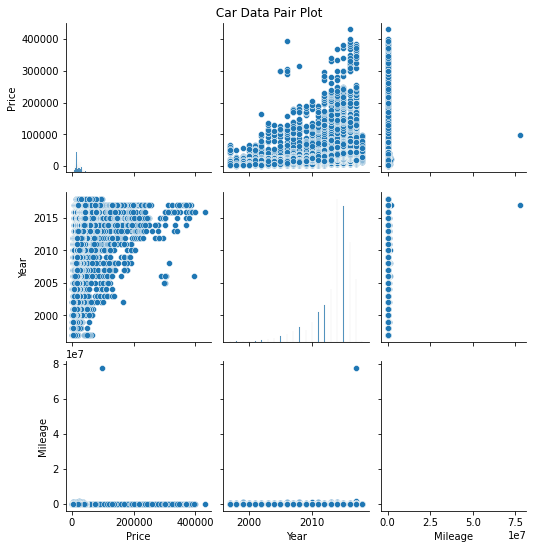

In [ ]:
ax = sns.pairplot(ndno_pandas, vars = ['Price', 'Year', 'Mileage'])

#Made a pair plot using seaborn 

ax.fig.suptitle(" Car Data Pair Plot", y= 1.01)

# In the Mileage/Price plot we observe that the lesser is the mileage, the higher
# is the price. In the Year/Price plot instead, we observe that the prices
# are somewhat equally distributed between the various years.



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 5.123220
Kurtosis: 88.029175


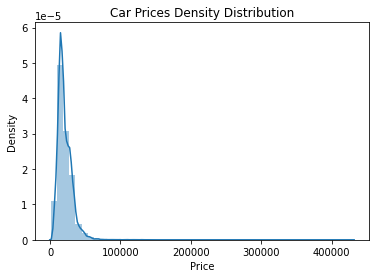

In [ ]:
sns.distplot(ndno_pandas['Price'])

#skewness and kurtosis
plt.title('Car Prices Density Distribution')

print("Skewness: %f" % ndno_pandas['Price'].skew())
print("Kurtosis: %f" % ndno_pandas['Price'].kurt())


#We can observe that the distribution of prices shows a skewed data to the right (skew > 1). A kurtosis value of 87.1 is extremely high, meaning that
#there is a profusion of outliers in the dataset and we realised we had to remove those from the data.


In [ ]:
# Outliers Removal
'''from pyspark.sql import functions as f
def find_outliers(df):

    # Identifying the numerical columns in a spark dataframe
    numeric_columns = [column[0] for column in df.dtypes if column[1]=='int']

    # Using the `for` loop to create new columns by identifying the outliers for each feature
    for column in numeric_columns:

        less_Q1 = 'less_Q1_{}'.format(column)
        more_Q3 = 'more_Q3_{}'.format(column)
        Q1 = 'Q1_{}'.format(column)
        Q3 = 'Q3_{}'.format(column)

        # Q1 : First Quartile ., Q3 : Third Quartile
        Q1 = df.approxQuantile(column,[0.20],relativeError=0)
        Q3 = df.approxQuantile(column,[0.80],relativeError=0)
        
        # IQR : Inter Quantile Range
        # We need to define the index [0], as Q1 & Q3 are a set of lists., to perform a mathematical operation
        # Q1 & Q3 are defined seperately so as to have a clear indication on First Quantile & 3rd Quantile
        IQR = Q3[0] - Q1[0]
        
        #selecting the data, with -1.5*IQR to + 1.5*IQR., where param = 1.5 default value
        less_Q1 =  Q1[0] - 1.5*IQR
        more_Q3 =  Q3[0] + 1.5*IQR
        
        isOutlierCol = 'is_outlier_{}'.format(column)
        
        df = df.withColumn(isOutlierCol,f.when((df[column] > more_Q3) | (df[column] < less_Q1), 1).otherwise(0))
    

    # Selecting the specific columns which we have added above, to check if there are any outliers
    selected_columns = [column for column in df.columns if column.startswith("is_outlier")]

    # Adding all the outlier columns into a new colum "total_outliers", to see the total number of outliers
    df = df.withColumn('total_outliers',sum(df[column] for column in selected_columns))

    # Dropping the extra columns created above, just to create nice dataframe., without extra columns
    df = df.drop(*[column for column in df.columns if column.startswith("is_outlier")])

    return df'''

'from pyspark.sql import functions as f\ndef find_outliers(df):\n\n    # Identifying the numerical columns in a spark dataframe\n    numeric_columns = [column[0] for column in df.dtypes if column[1]==\'int\']\n\n    # Using the `for` loop to create new columns by identifying the outliers for each feature\n    for column in numeric_columns:\n\n        less_Q1 = \'less_Q1_{}\'.format(column)\n        more_Q3 = \'more_Q3_{}\'.format(column)\n        Q1 = \'Q1_{}\'.format(column)\n        Q3 = \'Q3_{}\'.format(column)\n\n        # Q1 : First Quartile ., Q3 : Third Quartile\n        Q1 = df.approxQuantile(column,[0.20],relativeError=0)\n        Q3 = df.approxQuantile(column,[0.80],relativeError=0)\n        \n        # IQR : Inter Quantile Range\n        # We need to define the index [0], as Q1 & Q3 are a set of lists., to perform a mathematical operation\n        # Q1 & Q3 are defined seperately so as to have a clear indication on First Quantile & 3rd Quantile\n        IQR = Q3[0] - Q1[0]\n

In [ ]:
'''new_df = find_outliers(used_cars_df)
new_df.show()
new_df_with_no_outliers1 = new_df.filter(new_df['total_Outliers']<=1)
new_df_with_no_outliers1 = new_df_with_no_outliers1.select(*used_cars_df.columns)
cars_df= new_df_with_no_outliers1'''


"new_df = find_outliers(used_cars_df)\nnew_df.show()\nnew_df_with_no_outliers1 = new_df.filter(new_df['total_Outliers']<=1)\nnew_df_with_no_outliers1 = new_df_with_no_outliers1.select(*used_cars_df.columns)\ncars_df= new_df_with_no_outliers1"

In [ ]:
pandas_car_df=cars_df.toPandas()

## Creating a clean dataset after removing the outliers and the columns that are not required

In [ ]:
cars_df = cars_df.drop('_c0', 'Id', 'Vin', 'City', 'Model')
print((cars_df.count(), len(cars_df.columns )), 'Used cars dataframe dimensions')


(728567, 5) Used cars dataframe dimensions


In [ ]:
from pyspark.sql.functions import upper, col
cars_df = cars_df.select("*", upper(col('State')))
cars_df.show()

+-----+----+-------+-----+-----+------------+
|Price|Year|Mileage|State| Make|upper(State)|
+-----+----+-------+-----+-----+------------+
|16472|2015|  18681|   MO|Buick|          MO|
|16784|2015|  22800|   NV|Buick|          NV|
|16995|2015|   8624|   FL|Buick|          FL|
|17700|2015|  13807|   NC|Buick|          NC|
|17432|2015|  11330|   MO|Buick|          MO|
|17222|2015|  10652|   OK|Buick|          OK|
|16476|2015|  21962|   GA|Buick|          GA|
|16000|2015|  19446|   MI|Buick|          MI|
|17500|2015|   7166|   NJ|Buick|          NJ|
|15995|2015|  20496|   GA|Buick|          GA|
|17000|2015|  13590|   NJ|Buick|          NJ|
|15499|2015|  37406|   TX|Buick|          TX|
|16445|2015|  19469|   TX|Buick|          TX|
|15750|2015|  26927|   TX|Buick|          TX|
|16567|2015|   6156|   FL|Buick|          FL|
|17479|2015|  15572|   CA|Buick|          CA|
|17300|2015|  24075|   NC|Buick|          NC|
|18676|2016|   3448|   Fl|Buick|          FL|
|17500|2016|  20157|   TX|Buick|  

In [ ]:
cars_df = cars_df.drop('State')

In [ ]:
cars_df = cars_df.withColumnRenamed("upper(State)","State")

In [ ]:
cars_df = cars_df.select("*", upper(col('Make')))
pandas_car_df=cars_df.toPandas()

[Text(0.5, 1.0, 'Correlation Matrix of the Used Car Data')]

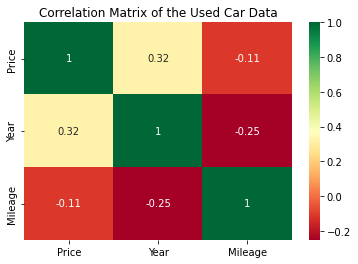

In [ ]:
correlation = cars_df.toPandas().corr()
dataplot = sns.heatmap(correlation, cmap="RdYlGn", annot=True).set(title='Correlation Matrix of the Used Car Data')

sns.set(rc={'figure.figsize':(15,9)})

dataplot

In [ ]:
from pyspark.sql.functions import sum,avg,max,count

make_grouped = cars_df.groupBy("Make").agg(avg("Price"))
make_grouped = make_grouped.withColumnRenamed('avg(Price)','Average_price')
make_grouped_pd = make_grouped.toPandas()
make_grouped_pd
#make_grouped = make_grouped_pd.head(20)
#make_grouped.show()

sorted_mdf = make_grouped_pd.sort_values(by='Average_price', ascending=False).head(20)

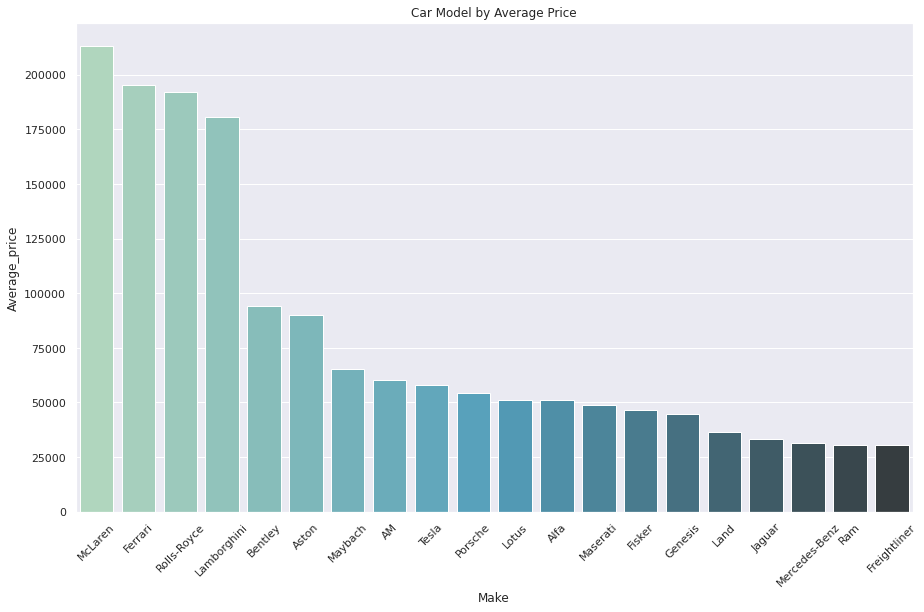

In [ ]:
sns.barplot(data = sorted_mdf, x="Make", y="Average_price", palette= "GnBu_d").set(title='Car Model by Average Price')
plt.xticks(rotation=45)

sns.set(rc={'figure.figsize':(20,8.27)})

## Geo-Map of the States by Used Car Prices

In [ ]:
mapdf = cars_df[['State','Price']]
mapdf.show()

+-----+-----+
|State|Price|
+-----+-----+
|   MO|16472|
|   NV|16784|
|   FL|16995|
|   NC|17700|
|   MO|17432|
|   OK|17222|
|   GA|16476|
|   MI|16000|
|   NJ|17500|
|   GA|15995|
|   NJ|17000|
|   TX|15499|
|   TX|16445|
|   TX|15750|
|   FL|16567|
|   CA|17479|
|   NC|17300|
|   FL|18676|
|   TX|17500|
|   ND|15995|
+-----+-----+
only showing top 20 rows



In [ ]:
mapdf_grouped = mapdf.groupBy("State").agg(avg("Price").alias("Average_price"))

mapdf_grouped.show()

+-----+------------------+
|State|     Average_price|
+-----+------------------+
|   ME|21839.739887990043|
|   WA| 20809.39880856545|
|   AL|21406.115813528337|
|   NM| 20823.18581971534|
|   MI|19545.329615170107|
|   HI|17242.068571428572|
|   VT|18766.280947255113|
|   MO| 20476.60349874547|
|   NE|21641.637226277373|
|   RI| 21402.96199376947|
|   NH|20976.545636109448|
|   AK|20435.058990760484|
|   AR| 22072.24628602112|
|   AZ|19828.474971907242|
|   WV|22125.495428096427|
|   TN| 20905.55873439205|
|   MA|20833.466877536404|
|   NY|21798.305696416497|
|   MD|20226.984523736413|
|   OH|19156.294002543782|
+-----+------------------+
only showing top 20 rows



In [ ]:
mdf_pd = mapdf_grouped.toPandas()

mdf_pd['State'] = mdf_pd['State'].apply(lambda x: x.strip())

mdf_pd.head()

,State,Average_price
0,ME,21839.739888
1,WA,20809.398809
2,AL,21406.115814
3,NM,20823.185820
4,MI,19545.329615


In [ ]:
import plotly.express as px
fig = px.choropleth(mdf_pd,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Average_price',
                    color_continuous_scale="Viridis_r", 
                    )

fig.update_layout(
      title_text = 'Average price for US States',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

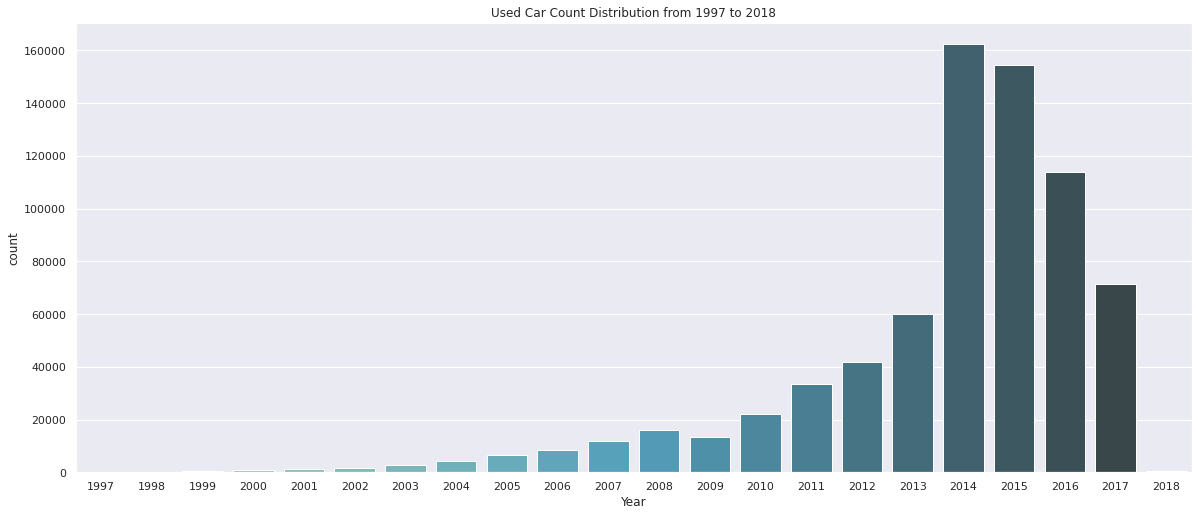

In [ ]:
sns.countplot(data=pandas_car_df, x="Year", palette= "GnBu_d", dodge=False)
plt.title('Used Car Count Distribution from 1997 to 2018')
sns.set(rc = {'figure.figsize':(16,9)})

In [ ]:
cdf_pandas = pandas_car_df['Make'].value_counts().to_frame().head(20)
#cdf_pandas.reset_index
cdf_pandas.columns = ['Count_of_Cars']
#cdf_pandas.reset_index

cdf_pandas.head()

,Count_of_Cars
Ford,97047
Chevrolet,90199
Toyota,68940
Nissan,59151
Honda,46035


In [ ]:
cdf_pandas.reset_index(inplace=True)
cdf_pandas = cdf_pandas.rename(columns = {'index':'Make'})
cdf_pandas

,Make,Count_of_Cars
0,Ford,97047
1,Chevrolet,90199
2,Toyota,68940
3,Nissan,59151
4,Honda,46035
5,Jeep,35490
6,Hyundai,33164
7,Dodge,31624
8,GMC,25911
9,Kia,25826


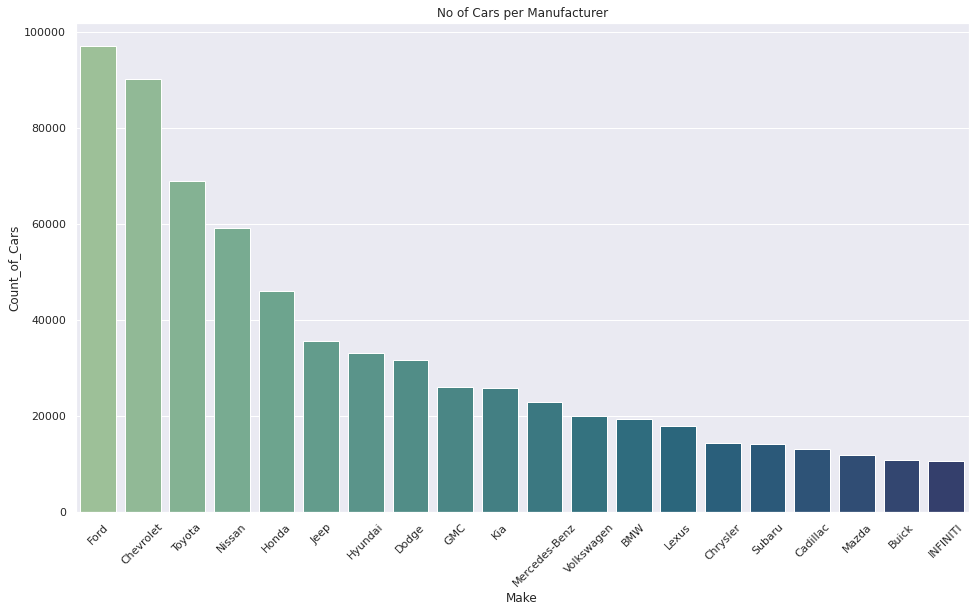

In [ ]:
sns.barplot(data = cdf_pandas, x="Make", y="Count_of_Cars", palette= "crest").set(title='No of Cars per Manufacturer')
plt.xticks(rotation=45)

sns.set(rc={'figure.figsize':(20,8.27)})

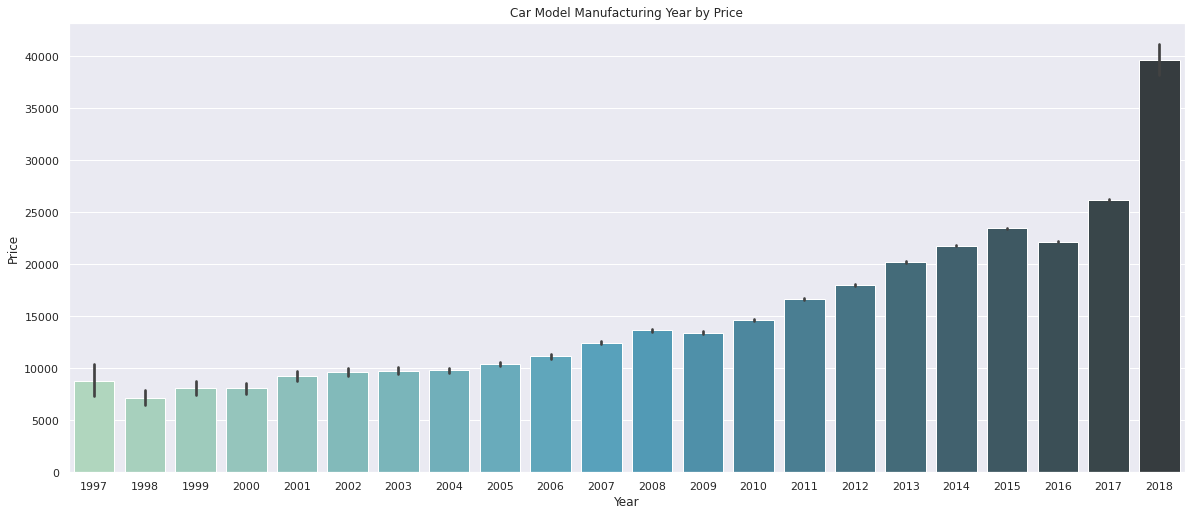

In [ ]:
sns.barplot(data = pandas_car_df, x="Year", y="Price", palette= "GnBu_d").set(title='Car Model Manufacturing Year by Price')

sns.set(rc={'figure.figsize':(20,8.27)})

# ML models

### Random Forest Regression to predict price

#### RF - only Mileage Scaled

In [ ]:
StringIndexer = Pipeline(stages=[feature.StringIndexer(inputCol='State', outputCol='state_in'),
                                 feature.StringIndexer(inputCol='Make', outputCol='make_in')])
cars_df_new = StringIndexer.fit(cars_df).transform(cars_df)                            

In [ ]:
training_df, validation_df, testing_df = cars_df_new.randomSplit([0.6, 0.3, 0.1])

In [ ]:
cars_df_new.show()

+-----+----+-------+-----+-----+-----------+--------+-------+
|Price|Year|Mileage| Make|State|upper(Make)|state_in|make_in|
+-----+----+-------+-----+-----+-----------+--------+-------+
|16472|2015|  18681|Buick|   MO|      BUICK|    17.0|   18.0|
|16784|2015|  22800|Buick|   NV|      BUICK|    31.0|   18.0|
|16995|2015|   8624|Buick|   FL|      BUICK|     2.0|   18.0|
|17700|2015|  13807|Buick|   NC|      BUICK|     5.0|   18.0|
|17432|2015|  11330|Buick|   MO|      BUICK|    17.0|   18.0|
|17222|2015|  10652|Buick|   OK|      BUICK|    23.0|   18.0|
|16476|2015|  21962|Buick|   GA|      BUICK|     3.0|   18.0|
|16000|2015|  19446|Buick|   MI|      BUICK|    24.0|   18.0|
|17500|2015|   7166|Buick|   NJ|      BUICK|     9.0|   18.0|
|15995|2015|  20496|Buick|   GA|      BUICK|     3.0|   18.0|
|17000|2015|  13590|Buick|   NJ|      BUICK|     9.0|   18.0|
|15499|2015|  37406|Buick|   TX|      BUICK|     0.0|   18.0|
|16445|2015|  19469|Buick|   TX|      BUICK|     0.0|   18.0|
|15750|2

In [ ]:
import numpy as np

In [ ]:
enable_grid_search = False

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor, GBTRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import functions as f

if enable_grid_search:
  #rfevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="charges", metricName="mse")
  ranfor1 = Pipeline(stages=[VectorAssembler(inputCols = ['Mileage'], outputCol="Mileage_new"), StandardScaler().setInputCol("Mileage_new").setOutputCol("Scaled_Mileage"), \
                                 VectorAssembler(inputCols= ['Scaled_Mileage', 'make_in', 'state_in', 'Year'], outputCol="features_final"), RandomForestRegressor(labelCol="Price", featuresCol="features_final")])
  grid = (ParamGridBuilder()
             .addGrid(ranfor1.getStages()[3].maxDepth, [10, 20])
               #.addGrid(model_ranfor.getStages()[1].maxDepth, [2, 5, 10])
             .addGrid(ranfor1.getStages()[3].maxBins, [60, 100])
               #.addGrid(model_ranfor.getStages()[1].maxBins, [5, 7 ,10, 20])
             .addGrid(ranfor1.getStages()[3].numTrees, [50, 100])
               #.addGrid(model_ranfor.getStages()[1].numTrees, [5, 10, 20])
             .build())
  
  print(len(grid))
  all_models = []
  for j in range(len(grid)):
    print("Fitting model {}".format(j+1))
    model = ranfor1.fit(training_df, grid[j])
    all_models.append(model)
  
  accuracies = [m.transform(validation_df).select(f.mean((f.col('Price') - f.col('prediction'))**2).alias('mse')).first().mse for m in all_models]
  best_model_idx = np.argmin(accuracies)
  print("best model index = ", best_model_idx)
  print("index = ", grid[best_model_idx])
  best_model = all_models[best_model_idx]
  best_model.transform(testing_df).select(f.mean((f.col('Price') - f.col('prediction'))**2).alias('mse')).show()
  pass

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
ranfor1 = Pipeline(stages=[VectorAssembler(inputCols = ['Mileage'], outputCol="Mileage_new"), StandardScaler().setInputCol("Mileage_new").setOutputCol("Scaled_Mileage"), \
                                 VectorAssembler(inputCols= ['Scaled_Mileage', 'make_in', 'state_in', 'Year'], outputCol="features_final"), RandomForestRegressor(maxDepth=10, maxBins=100 , numTrees=50 ,labelCol="Price", featuresCol="features_final")]).fit(cars_df_new)

In [ ]:
ranfor1.transform(cars_df_new).show()

+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+
|Price|Year|Mileage| Make|State|upper(Make)|state_in|make_in|Mileage_new|      Scaled_Mileage|      features_final|        prediction|
+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+
|16472|2015|  18681|Buick|   MO|      BUICK|    17.0|   18.0|  [18681.0]|[0.19282822803994...|[0.19282822803994...| 20507.85378616062|
|16784|2015|  22800|Buick|   NV|      BUICK|    31.0|   18.0|  [22800.0]|[0.23534519561644...|[0.23534519561644...|21173.399029842672|
|16995|2015|   8624|Buick|   FL|      BUICK|     2.0|   18.0|   [8624.0]|[0.08901828802614...|[0.08901828802614...| 19699.13502523286|
|17700|2015|  13807|Buick|   NC|      BUICK|     5.0|   18.0|  [13807.0]|[0.1425180313980795]|[0.14251803139807...| 20376.65641486492|
|17432|2015|  11330|Buick|   MO|      BUICK|    17.0|  

In [ ]:
evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="r2")

In [ ]:
rf_validation_mse = evaluator.evaluate(ranfor1.transform(validation_df), {evaluator.metricName: 'r2'})
rf_train_mse = evaluator.evaluate(ranfor1.transform(training_df), {evaluator.metricName: 'r2'})

In [ ]:
print(rf_validation_mse, rf_train_mse)

0.602342099655855 0.6178738333176375


In [ ]:
cars_df_new.columns

['Price',
 'Year',
 'Mileage',
 'Make',
 'State',
 'upper(Make)',
 'state_in',
 'make_in']

In [ ]:
rf_model = ranfor1.stages[-1]
list1=['Scaled_Mileage', 'make_in', 'state_in', 'Year']
rf_feature_importance = pd.DataFrame(list(zip(list1, rf_model.featureImportances.toArray())),
            columns = ['feature', 'importance']).sort_values('importance', ascending=False)

In [ ]:
rf_model.featureImportances

SparseVector(4, {0: 0.1206, 1: 0.6693, 2: 0.0286, 3: 0.1814})

In [ ]:
display(rf_feature_importance)

,feature,importance
1,make_in,0.669345
3,Year,0.181369
0,Scaled_Mileage,0.120645
2,state_in,0.028641


#### RF - All features Scaled

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
ranfor_all_scale = Pipeline(stages=[VectorAssembler(inputCols= ['Mileage', 'make_in', 'state_in', 'Year'], outputCol="features"),StandardScaler().setInputCol("features").setOutputCol("features_final"), RandomForestRegressor(maxDepth=10, maxBins=100 , numTrees=50 ,labelCol="Price", featuresCol="features_final")]).fit(cars_df_new)


In [ ]:
ranfor_all_scale.transform(cars_df_new).show()
evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="r2")
rf_validation_r2_allsc = evaluator.evaluate(ranfor_all_scale.transform(validation_df), {evaluator.metricName: 'r2'})
rf_train_r2_allsc = evaluator.evaluate(ranfor_all_scale.transform(training_df), {evaluator.metricName: 'r2'})
print(rf_validation_r2_allsc, rf_train_r2_allsc)

+-----+----+-------+-----+-----+-----------+--------+-------+--------------------+--------------------+------------------+
|Price|Year|Mileage| Make|State|upper(Make)|state_in|make_in|            features|      features_final|        prediction|
+-----+----+-------+-----+-----+-----------+--------+-------+--------------------+--------------------+------------------+
|16472|2015|  18681|Buick|   MO|      BUICK|    17.0|   18.0|[18681.0,18.0,17....|[0.19282822803994...|24779.563764688563|
|16784|2015|  22800|Buick|   NV|      BUICK|    31.0|   18.0|[22800.0,18.0,31....|[0.23534519561644...| 24951.10831670817|
|16995|2015|   8624|Buick|   FL|      BUICK|     2.0|   18.0|[8624.0,18.0,2.0,...|[0.08901828802614...|26064.649992055707|
|17700|2015|  13807|Buick|   NC|      BUICK|     5.0|   18.0|[13807.0,18.0,5.0...|[0.14251803139807...|25503.345394313652|
|17432|2015|  11330|Buick|   MO|      BUICK|    17.0|   18.0|[11330.0,18.0,17....|[0.11695004676904...| 25088.38495414616|
|17222|2015|  10

#### RF - Mileage scaled with log value of price.

In [ ]:
#cars_df_log = cars_df_new.withColumn("logvalue", log(col("Price")))
#training_df, validation_df, testing_df = cars_df_log.randomSplit([0.6, 0.3, 0.1])

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
ranfor_log = Pipeline(stages=[VectorAssembler(inputCols = ['Mileage'], outputCol="Mileage_new"), StandardScaler().setInputCol("Mileage_new").setOutputCol("Scaled_Mileage"), \
                                 VectorAssembler(inputCols= ['Scaled_Mileage', 'make_in', 'state_in', 'Year'], outputCol="features_final"), RandomForestRegressor(maxDepth=10, maxBins=100 , numTrees=60 ,labelCol="Price", featuresCol="features_final")]).fit(cars_df_new)

In [ ]:
new_lof_rf_pred = ranfor_log.transform(cars_df_new)
new_lof_rf_pred = new_lof_rf_pred.withColumn("prediction_antilog", exp(col("prediction")))
new_lof_rf_pred.show()

+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+------------------+
|Price|Year|Mileage| Make|State|upper(Make)|state_in|make_in|Mileage_new|      Scaled_Mileage|      features_final|        prediction|prediction_antilog|
+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+------------------+
|16472|2015|  18681|Buick|   MO|      BUICK|    17.0|   18.0|  [18681.0]|[0.19282822803994...|[0.19282822803994...| 20641.70936958075|          Infinity|
|16784|2015|  22800|Buick|   NV|      BUICK|    31.0|   18.0|  [22800.0]|[0.23534519561644...|[0.23534519561644...|21148.272029633543|          Infinity|
|16995|2015|   8624|Buick|   FL|      BUICK|     2.0|   18.0|   [8624.0]|[0.08901828802614...|[0.08901828802614...|  19979.3324768974|          Infinity|
|17700|2015|  13807|Buick|   NC|      BUICK|     5.0|   18.0|  [13807.0]|[0.

In [ ]:
evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="r2")

In [ ]:
rflog_validation_mse = evaluator.evaluate(ranfor_log.transform(validation_df), {evaluator.metricName: 'r2'})
rflog_train_mse = evaluator.evaluate(ranfor_log.transform(training_df), {evaluator.metricName: 'r2'})

In [ ]:
print(rflog_validation_mse, rflog_train_mse)

0.6019573862245076 0.6180769104232883


In [ ]:
#MSE Calculated
print('Computed MSE :')
mse = f.mean((f.col('Price') - f.col('prediction'))**2).alias('mse')

ranfor_log.transform(cars_df_new).select(mse).show()

#MSE using built-in function

print('MSE using built-in function :')
valuesAndPreds = ranfor_log.transform(cars_df_new)
valuesAndPreds.show()
valuesAndPreds = valuesAndPreds[['Price','prediction']]

evaluator = RegressionEvaluator()
evaluator.setPredictionCol('prediction')
evaluator.setLabelCol('Price')

evaluator.evaluate(valuesAndPreds, {evaluator.metricName: "mse"})

Computed MSE :
+-------------------+
|                mse|
+-------------------+
|5.017249850746984E7|
+-------------------+

MSE using built-in function :
+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+
|Price|Year|Mileage| Make|State|upper(Make)|state_in|make_in|Mileage_new|      Scaled_Mileage|      features_final|        prediction|
+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+
|16472|2015|  18681|Buick|   MO|      BUICK|    17.0|   18.0|  [18681.0]|[0.19282822803994...|[0.19282822803994...| 20641.70936958075|
|16784|2015|  22800|Buick|   NV|      BUICK|    31.0|   18.0|  [22800.0]|[0.23534519561644...|[0.23534519561644...|21148.272029633543|
|16995|2015|   8624|Buick|   FL|      BUICK|     2.0|   18.0|   [8624.0]|[0.08901828802614...|[0.08901828802614...|  19979.3324768974|
|17700|2015|  13807|Buick|   NC|  

50172498.50746983

In [ ]:
evaluator.evaluate(valuesAndPreds, {evaluator.metricName: "rmse"})

7083.254796170319

## GBT Regressor

#### GBT - Only Mileage Scaled

In [ ]:
if enable_grid_search:
  #rfevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="charges", metricName="mse")
  gbt = Pipeline(stages=[VectorAssembler(inputCols = ['Mileage'], outputCol="Mileage_new"), StandardScaler().setInputCol("Mileage_new").setOutputCol("Scaled_Mileage"), \
                                 VectorAssembler(inputCols= ['Scaled_Mileage', 'make_in', 'state_in', 'Year'], outputCol="features_final"), GBTRegressor(labelCol="Price", featuresCol="features_final")])
  grid = (ParamGridBuilder()
             .addGrid(gbt.getStages()[3].maxDepth, [20])
               #.addGrid(model_ranfor.getStages()[1].maxDepth, [2, 5, 10])
             .addGrid(gbt.getStages()[3].maxBins, [60])
               #.addGrid(model_ranfor.getStages()[1].maxBins, [5, 7 ,10, 20])
             .addGrid(gbt.getStages()[3].maxIter, [100])
               #.addGrid(model_ranfor.getStages()[1].numTrees, [5, 10, 20])
             .build())
  all_models = []
  for j in range(len(grid)):
    print("Fitting model {}".format(j+1))
    model = gbt.fit(training_df, grid[j])
    all_models.append(model)
  
  accuracies = [m.transform(validation_df).select(f.mean((f.col('Price') - f.col('prediction'))**2).alias('mse')).first().mse for m in all_models]
  best_model_idx = np.argmin(accuracies)
  print("best model index = ", best_model_idx)
  print("index = ", grid[best_model_idx])
  best_model = all_models[best_model_idx]
  best_model.transform(testing_df).select(f.mean((f.col('Price') - f.col('prediction'))**2).alias('mse')).show()
  pass

In [ ]:
from pyspark.ml.regression import GBTRegressor
gbt1 = Pipeline(stages=[VectorAssembler(inputCols = ['Mileage'], outputCol="Mileage_new"), StandardScaler().setInputCol("Mileage_new").setOutputCol("Scaled_Mileage"), \
                                 VectorAssembler(inputCols= ['Scaled_Mileage', 'make_in', 'state_in', 'Year'], outputCol="features_final"), GBTRegressor(maxDepth=10, maxBins=100 , maxIter=50 ,labelCol="Price", featuresCol="features_final")]).fit(cars_df_new)

In [ ]:
gbt1.transform(cars_df_new).show()

+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+
|Price|Year|Mileage| Make|State|upper(Make)|state_in|make_in|Mileage_new|      Scaled_Mileage|      features_final|        prediction|
+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+
|16472|2015|  18681|Buick|   MO|      BUICK|    17.0|   18.0|  [18681.0]|[0.19282822803994...|[0.19282822803994...|18479.462431257834|
|16784|2015|  22800|Buick|   NV|      BUICK|    31.0|   18.0|  [22800.0]|[0.23534519561644...|[0.23534519561644...| 17901.55099711467|
|16995|2015|   8624|Buick|   FL|      BUICK|     2.0|   18.0|   [8624.0]|[0.08901828802614...|[0.08901828802614...|19298.449049340998|
|17700|2015|  13807|Buick|   NC|      BUICK|     5.0|   18.0|  [13807.0]|[0.1425180313980795]|[0.14251803139807...|21269.287575635826|
|17432|2015|  11330|Buick|   MO|      BUICK|    17.0|  

In [ ]:
evaluator_gbt = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="r2")

In [ ]:
gbt_validation_mse = evaluator_gbt.evaluate(gbt1.transform(validation_df), {evaluator.metricName: 'r2'})

In [ ]:
print(gbt_validation_mse)

0.6442922240260671


In [ ]:
gbt_model = gbt1.stages[-1]
list2=['Scaled_Mileage', 'make_in', 'state_in', 'Year']
gbt_feature_importance = pd.DataFrame(list(zip(list2, gbt_model.featureImportances.toArray())),
            columns = ['feature', 'importance']).sort_values('importance', ascending=False)

In [ ]:
display(gbt_feature_importance)

,feature,importance
1,make_in,0.495956
3,Year,0.220266
2,state_in,0.151188
0,Scaled_Mileage,0.132590


In [ ]:
#MSE Calculated
print('Computed MSE :')
mse = f.mean((f.col('Price') - f.col('prediction'))**2).alias('mse')

gbt1.transform(cars_df_new).select(mse).show()

#MSE using built-in function

print('MSE using built-in function :')
valuesAndPreds = gbt1.transform(cars_df_new)
valuesAndPreds.show()
valuesAndPreds = valuesAndPreds[['Price','prediction']]

evaluator = RegressionEvaluator()
evaluator.setPredictionCol('prediction')
evaluator.setLabelCol('Price')

evaluator.evaluate(valuesAndPreds, {evaluator.metricName: "mse"})


Computed MSE :
+-------------------+
|                mse|
+-------------------+
|4.475311211607122E7|
+-------------------+

MSE using built-in function :
+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+
|Price|Year|Mileage| Make|State|upper(Make)|state_in|make_in|Mileage_new|      Scaled_Mileage|      features_final|        prediction|
+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+
|16472|2015|  18681|Buick|   MO|      BUICK|    17.0|   18.0|  [18681.0]|[0.19282822803994...|[0.19282822803994...|18479.462431257834|
|16784|2015|  22800|Buick|   NV|      BUICK|    31.0|   18.0|  [22800.0]|[0.23534519561644...|[0.23534519561644...| 17901.55099711467|
|16995|2015|   8624|Buick|   FL|      BUICK|     2.0|   18.0|   [8624.0]|[0.08901828802614...|[0.08901828802614...|19298.449049340998|
|17700|2015|  13807|Buick|   NC|  

44753112.116071224

In [ ]:
evaluator.evaluate(valuesAndPreds, {evaluator.metricName: "rmse"})

6689.776686562207

## Linear Regression - Mileage scaled


In [ ]:
linear_reg = Pipeline(stages=[VectorAssembler(inputCols = ['Mileage'], outputCol="Mileage_new"), StandardScaler().setInputCol("Mileage_new").setOutputCol("Scaled_Mileage"), \
                                 VectorAssembler(inputCols= ['Scaled_Mileage', 'make_in', 'state_in', 'Year'], outputCol="features_final"), regression.LinearRegression(labelCol="Price", featuresCol="features_final")]).fit(cars_df_new)

In [ ]:
linear_reg.transform(cars_df_new).show()

+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+
|Price|Year|Mileage| Make|State|upper(Make)|state_in|make_in|Mileage_new|      Scaled_Mileage|      features_final|        prediction|
+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+
|16472|2015|  18681|Buick|   MO|      BUICK|    17.0|   18.0|  [18681.0]|[0.19282822803994...|[0.19282822803994...| 25895.18878423795|
|16784|2015|  22800|Buick|   NV|      BUICK|    31.0|   18.0|  [22800.0]|[0.23534519561644...|[0.23534519561644...| 25882.88635607902|
|16995|2015|   8624|Buick|   FL|      BUICK|     2.0|   18.0|   [8624.0]|[0.08901828802614...|[0.08901828802614...| 25921.75548593141|
|17700|2015|  13807|Buick|   NC|      BUICK|     5.0|   18.0|  [13807.0]|[0.1425180313980795]|[0.14251803139807...|25908.919970785268|
|17432|2015|  11330|Buick|   MO|      BUICK|    17.0|  

In [ ]:
evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="r2")
lin_validation_r2 = evaluator.evaluate(linear_reg.transform(validation_df), {evaluator.metricName: 'r2'})

In [ ]:
coefficients_no = linear_reg.stages[-1].coefficients
list_coefficients=['Scaled_Mileage', 'make_in', 'state_in', 'Year']
inf_pd = pd.DataFrame(list(zip(list_coefficients, coefficients_no)), columns = ['prediction_col', 'value'])

In [ ]:
inf_pd = pd.DataFrame(list(zip(list_coefficients, coefficients_no)), columns = ['prediction_col', 'value'])
display(inf_pd)

,prediction_col,value
0,Scaled_Mileage,-229.770634
1,make_in,291.200136
2,state_in,-0.180948
3,Year,1315.959634


In [ ]:
display(lin_validation_r2)

0.14222634349674312

In [ ]:
#MSE Calculated
print('Computed MSE :')
mse = f.mean((f.col('Price') - f.col('prediction'))**2).alias('mse')

linear_reg.transform(cars_df_new).select(mse).show()

#MSE using built-in funciton

print('MSE using built-in function :')
valuesAndPreds = linear_reg.transform(cars_df_new)
valuesAndPreds.show()
valuesAndPreds = valuesAndPreds[['Price','prediction']]

evaluator = RegressionEvaluator()
evaluator.setPredictionCol('prediction')
evaluator.setLabelCol('Price')

evaluator.evaluate(valuesAndPreds, {evaluator.metricName: "mse"})



Computed MSE :
+--------------------+
|                 mse|
+--------------------+
|1.1077947174453576E8|
+--------------------+

MSE using built-in function :
+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+
|Price|Year|Mileage| Make|State|upper(Make)|state_in|make_in|Mileage_new|      Scaled_Mileage|      features_final|        prediction|
+-----+----+-------+-----+-----+-----------+--------+-------+-----------+--------------------+--------------------+------------------+
|16472|2015|  18681|Buick|   MO|      BUICK|    17.0|   18.0|  [18681.0]|[0.19282822803994...|[0.19282822803994...| 25895.18878423795|
|16784|2015|  22800|Buick|   NV|      BUICK|    31.0|   18.0|  [22800.0]|[0.23534519561644...|[0.23534519561644...| 25882.88635607902|
|16995|2015|   8624|Buick|   FL|      BUICK|     2.0|   18.0|   [8624.0]|[0.08901828802614...|[0.08901828802614...| 25921.75548593141|
|17700|2015|  13807|Buick|   

110779471.74453576

In [ ]:
evaluator.evaluate(valuesAndPreds, {evaluator.metricName: "rmse"})

10525.182741621913

In [ ]:
linear_model = linear_reg.stages[-1]
#list2=['Scaled_Mileage', 'make_in', 'state_in', 'Year']
linear_feature_importance = pd.DataFrame(list(zip(list2, linear_reg.stages[-1].coefficients.toArray())),
            columns = ['feature', 'importance']).sort_values('importance', ascending=False)

In [ ]:
linear_feature_importance

,feature,importance
3,Year,1315.959634
1,make_in,291.200136
2,state_in,-0.180948
0,Scaled_Mileage,-229.770634


In [ ]:
model_comparision = {'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosted Tree'], 'R2 Values': [0.14, 0.60 , 0.64], 'MSE': [110779471.7, 50172498.5, 44753112.1], 'RMSE': [10525.18, 7083.2, 6689.77]}


In [ ]:
dpd = pd.DataFrame.from_dict(model_comparision)
dpd

,Model,R2 Values,MSE,RMSE
0,Linear Regression,0.14,110779471.7,10525.18
1,Random Forest,0.60,50172498.5,7083.20
2,Gradient Boosted Tree,0.64,44753112.1,6689.77
